In [ ]:
!pip install spacy
!pip install wordcloud

In [ ]:
!python -m spacy download en_core_web_md

In [4]:
import numpy as np   # linear algebra
import pandas as pd  # data processing ,CSV file I/O (e.g pd.read_csv)
import string        # special operations on strings
import spacy         # language models
from matplotlib import pyplot as plt
from wordcloud import wordcloud,STOPWORDS
import seaborn

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


# Problem Statment

 TWO:
1) Extract reviews of any product from ecommerce website like amazon

2) Perform emotion mining

In [5]:
drak=pd.read_csv('/content/Dark Chocolate data1.csv',encoding='latin',error_bad_lines=False)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
drak

In [7]:
drak.columns

Index(['Star-rating', 'Name', 'Reviewer Profile Url', 'Review Title',
       'Review Content', 'images', 'profile icon', 'Date'],
      dtype='object')

In [ ]:
drak=drak['Review Content']
drak=drak.astype(str)
drak=drak[drak.str.contains('nan')==False]
drak

In [ ]:
# remove both the leading and the trailing characters
drak= [y.strip() for y in drak]
drak

In [ ]:
# removes empty strings, because they are considered in Python as False
drak= [x for x in drak if x] 
drak

In [11]:
len(drak)

1247

# text preprocessing

In [12]:
text=' '.join(drak)

In [13]:
len(text)

140776

In [14]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
text_tokens=tknzr.tokenize(text)
print(text_tokens)

['These', 'taste', 'delicious', 'abd', 'I', 'love', 'that', 'they', 'are', 'dark', 'chocolate', 'Dark', 'chocolate', 'is', 'supposed', 'to', 'be', 'rich', 'in', 'iron', 'and', 'this', 'has', 'absolutely', 'none', '.', 'Makes', 'me', 'think', 'it', "isn't", 'really', 'dark', 'chocolate', 'at', 'all', '.', 'This', 'is', 'the', 'BEST', 'truffle', 'EVER', '?', '?', '?', 'Actually', ',', 'these', 'candies', 'are', 'my', "wife's", 'favorite', ',', 'but', 'I', 'am', 'guilty', 'eating', 'them', 'too', 'occasionally', '.', 'They', 'are', 'very', 'tasty', 'and', 'delicious', 'desert', '.', 'A', '+', 'I', 'find', 'a', 'great', 'acceptance', 'with', 'my', 'friends', 'and', 'family', '.', 'These', 'gourmet', 'truffles', 'are', 'decadently', 'rich', 'with', 'a', 'smooth', 'warmth', 'which', 'caresses', 'the', 'palate', 'with', 'absolute', 'deliciousness', '.', 'Will', 'purchase', 'again', '.', 'Does', 'not', 'taste', 'as', 'good', 'as', 'it', 'should', 'Product', 'arrived', 'with', 'the', 'shrink', 

In [15]:
len(text_tokens)

29069

In [ ]:
text_tokens_text=' '.join(text_tokens)
text_tokens_text

In [ ]:
no_punc_text = text_tokens_text.translate(str.maketrans('', '', string.punctuation))
no_punc_text

In [ ]:
# remove https or url within text
import re
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text

In [ ]:
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_text)
print(text_tokens)

In [20]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
from nltk.corpus import stopwords
my_stop_words = stopwords.words('english')

sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)

In [22]:
no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['These', 'taste', 'delicious', 'abd', 'love', 'dark', 'chocolate', 'Dark', 'chocolate', 'supposed', 'rich', 'iron', 'absolutely', 'none', '.', 'Makes', 'think', 'really', 'dark', 'chocolate', '.', 'This', 'BEST', 'truffle', 'EVER', '?', '?', '?', 'Actually', ',', 'candies', "wife's", 'favorite', ',', 'guilty', 'eating', 'occasionally', '.', 'They', 'tasty', 'delicious', 'desert', '.', 'A', '+', 'find', 'great', 'acceptance', 'friends', 'family', '.', 'These', 'gourmet', 'truffles', 'decadently', 'rich', 'smooth', 'warmth', 'caresses', 'palate', 'absolute', 'deliciousness', '.', 'Will', 'purchase', '.', 'Does', 'taste', 'good', 'Product', 'arrived', 'shrink', 'wrap', 'opened', '.', 'They', 'taste', 'good', ',', 'chocolate', 'discolored', '(', 'white', 'specks', ')', ',', 'even', 'though', 'printed', 'expiration', 'date', '9/30', '/', '2023', '.', 'Very', 'tasty', 'milk', 'chocolate', '.', 'Disappointed', 'truffles', 'dark', 'chocolate', 'advertised', '.', 'These', 'smoothest', ',', 'de

In [23]:
len(no_stop_tokens)

17865

# Normalize the data

In [24]:
lower_words = [Text.lower() for Text in no_stop_tokens]
print([lower_words[0:25]])

[['these', 'taste', 'delicious', 'abd', 'love', 'dark', 'chocolate', 'dark', 'chocolate', 'supposed', 'rich', 'iron', 'absolutely', 'none', '.', 'makes', 'think', 'really', 'dark', 'chocolate', '.', 'this', 'best', 'truffle', 'ever']]


# Stemming

In [25]:
# Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['these', 'tast', 'delici', 'abd', 'love', 'dark', 'chocol', 'dark', 'chocol', 'suppos', 'rich', 'iron', 'absolut', 'none', '.', 'make', 'think', 'realli', 'dark', 'chocol', '.', 'thi', 'best', 'truffl', 'ever', '?', '?', '?', 'actual', ',', 'candi', "wife'", 'favorit', ',', 'guilti', 'eat', 'occasion', '.', 'they', 'tasti']


In [ ]:
!python -m spacy download en

In [27]:
nlp = spacy.load('en_core_web_sm')

# Lemetization

In [28]:
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

These taste delicious abd love dark chocolate Dark chocolate supposed rich iron absolutely none . Makes think really dark chocolate . This BEST truffle EVER ? ? ? Actually , candies wife's favorite , guilty eating occasionally . They


In [ ]:
lemmas = [token.lemma_ for token in doc]
lemmas

In [ ]:
clean_text=' '.join(lemmas)
clean_text

In [31]:
len(lemmas)

18158

# Feature Extraction

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [33]:
X

<18158x2024 sparse matrix of type '<class 'numpy.int64'>'
	with 14198 stored elements in Compressed Sparse Row format>

In [ ]:
vectorizer.vocabulary_

In [ ]:
pd.DataFrame.from_records([vectorizer.vocabulary_])

In [ ]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T

In [ ]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(by = 0, ascending=False)

In [ ]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(by = 0, ascending=True).head(20)

In [ ]:
vectorizer.get_feature_names()

In [ ]:
X.toarray()

In [41]:
print(X.toarray().shape)

(18158, 2024)


In [ ]:
print(X.toarray()[50:150])

# Bigrams and trigrams

In [43]:
vectorizer_nigram_range = CountVectorizer(analyzer = 'word',
                                          ngram_range=(1,3),
                                          max_features=100) 
    
bow_matrix_ngram = vectorizer_nigram_range.fit_transform(lemmas)
bow_matrix_ngram

<18158x100 sparse matrix of type '<class 'numpy.int64'>'
	with 7623 stored elements in Compressed Sparse Row format>

In [44]:
print(vectorizer_nigram_range.get_feature_names())

['always', 'amazon', 'arrive', 'be', 'box', 'but', 'buy', 'candy', 'chocolate', 'christmas', 'cold', 'come', 'condition', 'cool', 'dark', 'day', 'deal', 'delicious', 'disappointed', 'eat', 'even', 'ever', 'excellent', 'expect', 'favorite', 'flavor', 'fresh', 'get', 'gift', 'give', 'go', 'good', 'great', 'hard', 'heat', 'ice', 'inside', 'it', 'keep', 'know', 'last', 'like', 'lindor', 'lindt', 'little', 'look', 'love', 'make', 'melt', 'milk', 'mouth', 'much', 'my', 'nice', 'not', 'old', 'one', 'open', 'order', 'pack', 'package', 'perfect', 'price', 'product', 'purchase', 'quality', 'really', 'receive', 'say', 'see', 'ship', 'shipping', 'smooth', 'so', 'still', 'store', 'summer', 'taste', 'thank', 'the', 'these', 'they', 'think', 'this', 'time', 'treat', 'truffle', 'try', 'use', 've', 'very', 'want', 'well', 'what', 'white', 'will', 'would', 'year', 'yum', 'yummy']


In [ ]:
print(bow_matrix_ngram.toarray())

# TF-IDF vectorizer

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",
                                                 analyzer='word', 
                                                 ngram_range=(1,3), 
                                                 max_features = 10) 

tf_idf_matrix_n_gram_max_features = vectorizer_n_gram_max_features.fit_transform(lemmas)
tf_idf_matrix_n_gram_max_features

<18158x10 sparse matrix of type '<class 'numpy.float64'>'
	with 2623 stored elements in Compressed Sparse Row format>

In [47]:
print(vectorizer_n_gram_max_features.get_feature_names())

['box', 'chocolate', 'dark', 'good', 'great', 'love', 'melt', 'order', 'the', 'truffle']


In [ ]:
print(tf_idf_matrix_n_gram_max_features.toarray())

In [ ]:
pd.DataFrame(tf_idf_matrix_n_gram_max_features.toarray(),
             columns = vectorizer_n_gram_max_features.get_feature_names())

# Generate WordCloud

In [50]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
  
    # Set figure size
    plt.figure(figsize=(40, 30))

    # Display image
    plt.imshow(wordcloud) 
    
    # No axis details
    plt.axis("off");

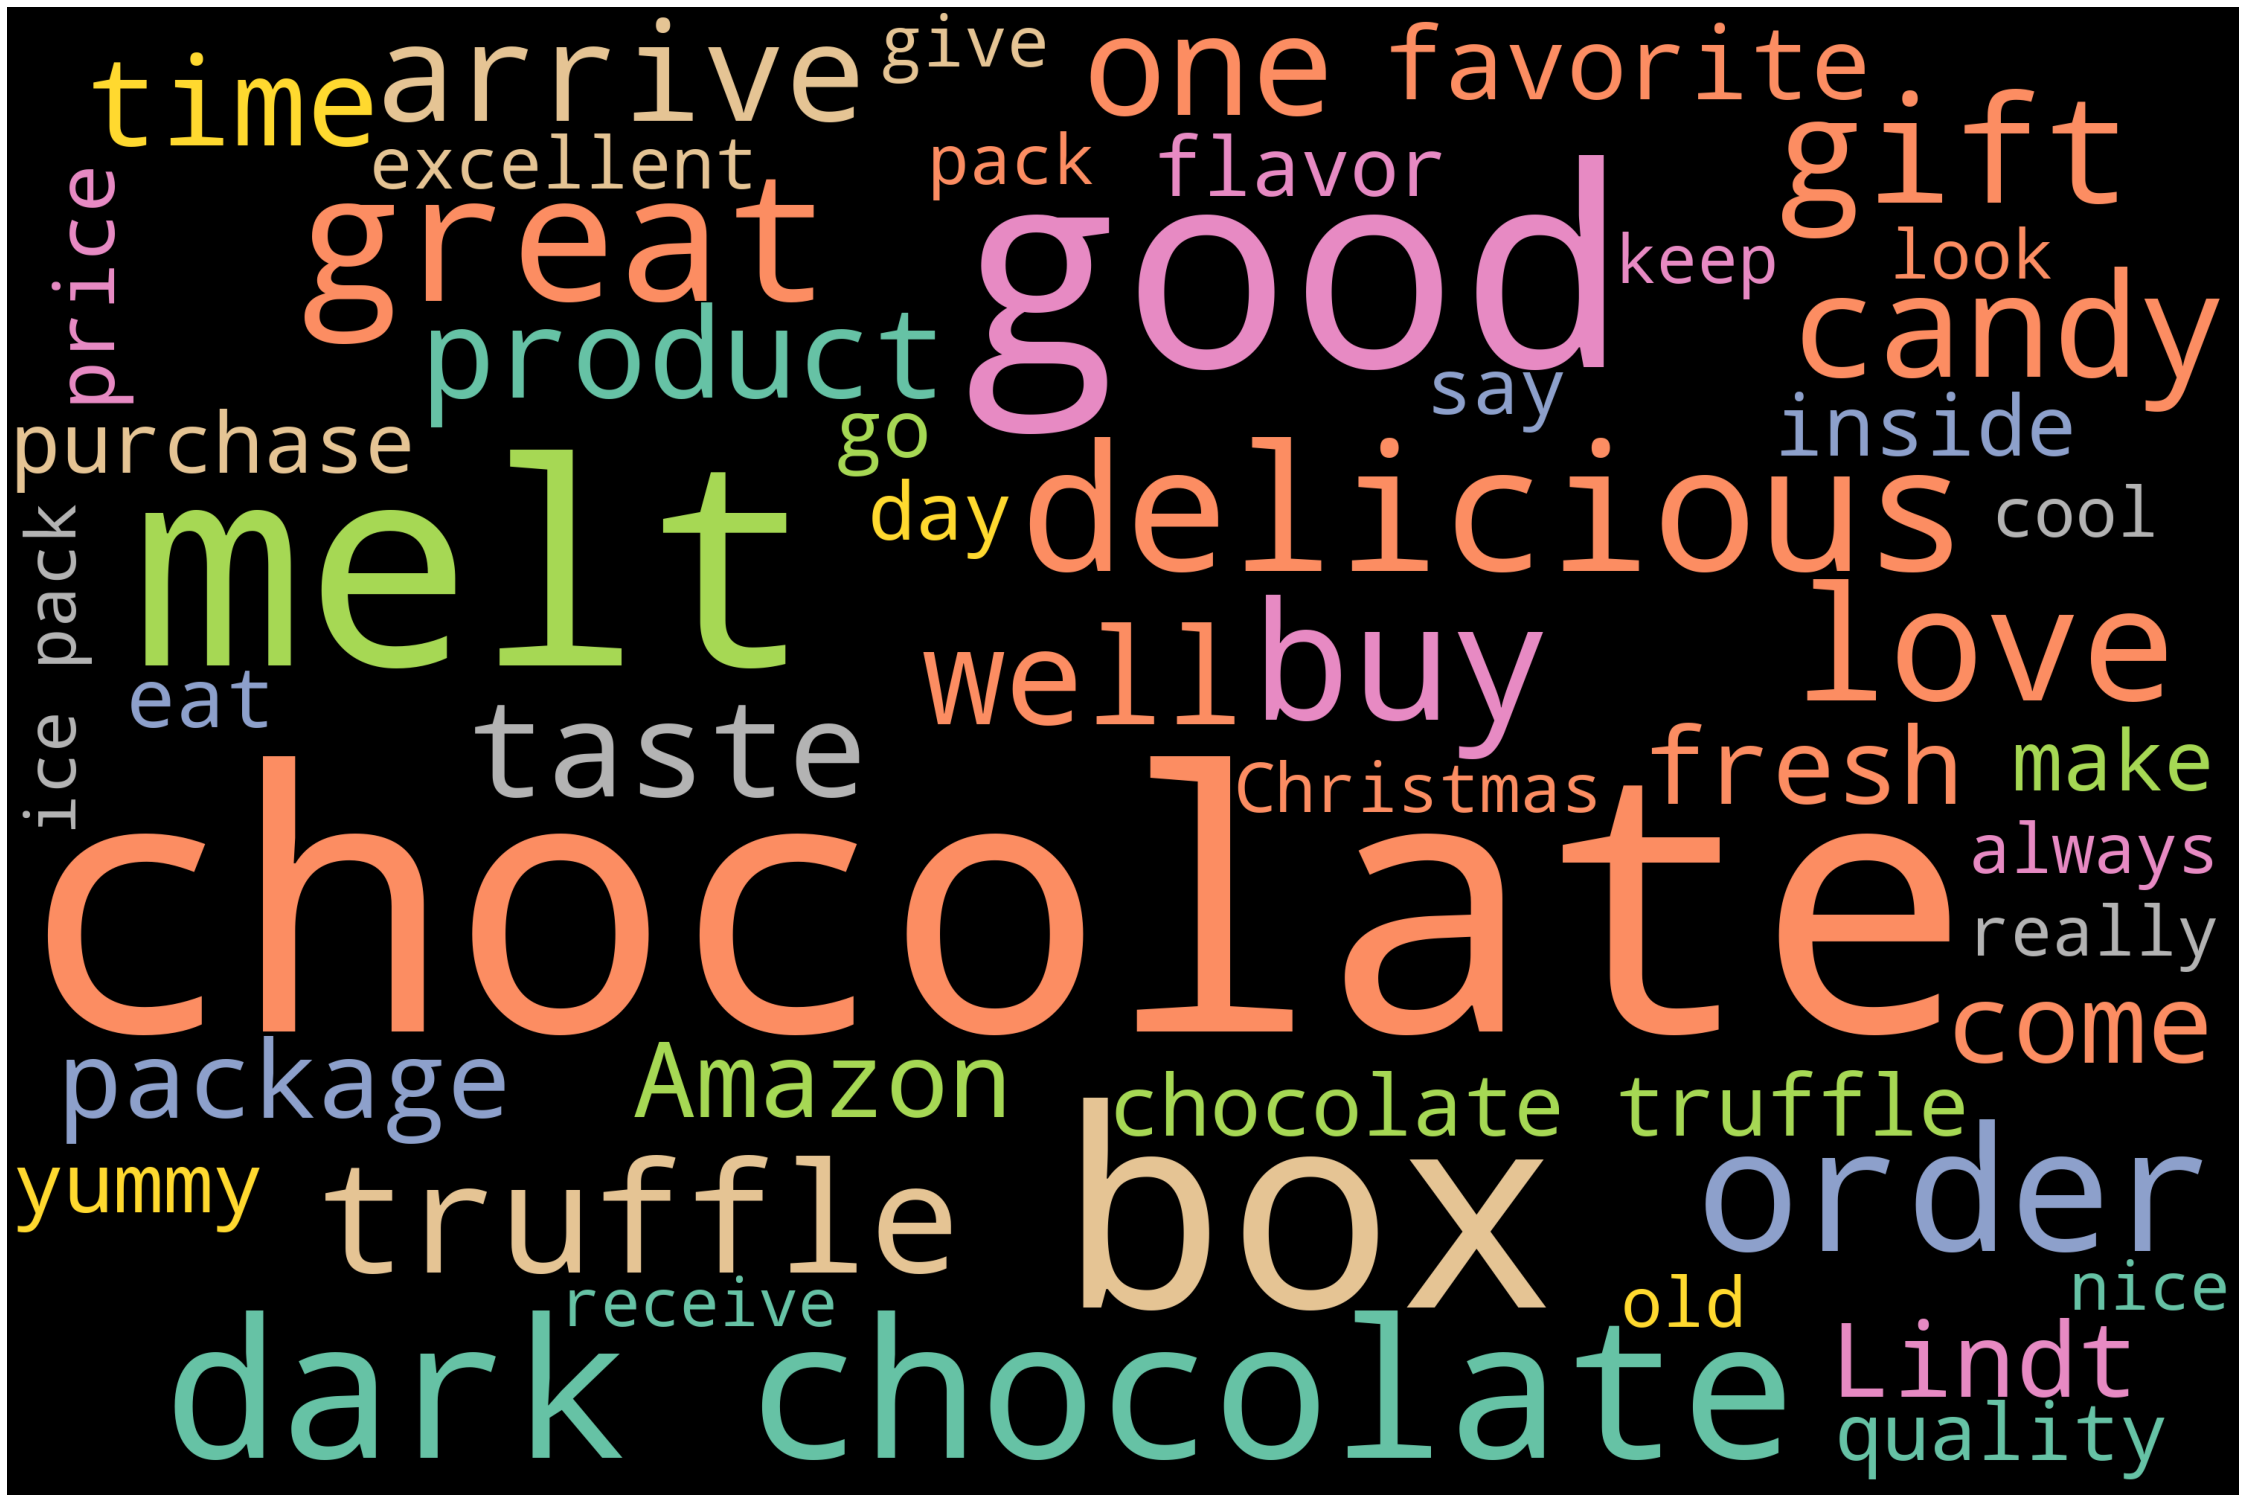

In [51]:
# Generate Word Cloud

from wordcloud import WordCloud
STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,
                    height=2000,
                    background_color='black',
                    max_words=50,
                   colormap='Set2',
                    stopwords=STOPWORDS).generate(clean_text)
plot_cloud(wordcloud)

# Named Entity Recogination

In [52]:
nlp = spacy.load('en_core_web_sm')
one_block = clean_text
one_block

'these taste delicious abd love dark chocolate dark chocolate suppose rich iron absolutely none . make think really dark chocolate . this well truffle ever ? ? ? actually , candy wife \'s favorite , guilty eating occasionally . they tasty delicious desert . a + find great acceptance friend family . these gourmet truffle decadently rich smooth warmth caress palate absolute deliciousness . will purchase . do taste good Product arrive shrink wrap open . they taste good , chocolate discolor ( white speck ) , even though print expiration date 9/30 / 2023 . very tasty milk chocolate . disappointed truffle dark chocolate advertise . these smooth , delicious chocolate . wonderful dark chocolate flavor ! family gift thanksgiving really love Lindt LINDOR Dark Chocolate Truffles ! they succulent Choclate ! if really like dark choclate like ! oh yes . love Lindt LINDOR dark chocolate truffle . in winter wait center melt mouth . but summer inside chocolate almost ( quite ) rich creamy liquid . it g

In [53]:
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style = 'ent', jupyter = True)

In [ ]:
#POS Tagging
for token in doc_block[:]:
  print(token, token.pos_)

In [ ]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]

nouns_verbs

In [56]:
len(nouns_verbs)

7069

In [57]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
X

<7069x1118 sparse matrix of type '<class 'numpy.int64'>'
	with 7044 stored elements in Compressed Sparse Row format>

In [58]:
X.shape

(7069, 1118)

In [ ]:
X.toarray()

In [ ]:
temp_df = pd.DataFrame(X.toarray(), columns = cv.get_feature_names())
temp_df

In [ ]:
cv.vocabulary_

In [62]:
sum_words = X.sum(axis = 0) #column total
sum_words

matrix([[2, 1, 1, ..., 2, 1, 1]])

In [63]:
type(sum_words)

numpy.matrix

In [ ]:
sorted(cv.vocabulary_)

In [ ]:
wf_df = pd.DataFrame({'word':cv.get_feature_names_out(),
                      'count':np.array(sum_words).flatten()}) 
wf_df

In [ ]:
wf_df.sort_values(by = 'count',
                  ascending=False,
                  inplace = True,
                  ignore_index = True)
wf_df

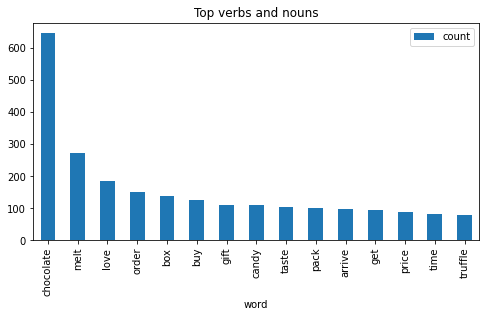

In [67]:
wf_df[0:15].plot.bar(x='word', figsize = (8,4), title = 'Top verbs and nouns')

# Emotion Mining

In [68]:
afinn = pd.read_csv('/content/Afinn.csv',error_bad_lines = False, sep = ",",encoding = 'latin-1')
afinn

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [69]:
afinn[1500:]

,word,value
1500,masterpieces,4
1501,matter,1
1502,matters,1
1503,mature,2
1504,meaningful,2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [70]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import pandas as pd
from nltk import tokenize

sentences = tokenize.sent_tokenize(" ".join(drak))

sentences

In [74]:
sent_df = pd.DataFrame(sentences, columns = ['sentence'])
sent_df

,sentence
0,These taste delicious abd I love that they are...
1,Makes me think it isn't really dark chocolate ...
2,This is the BEST truffle EVER????
3,"Actually, these candies are my wife's favorite..."
4,They are very tasty and delicious desert.
...,...
2353,I have bought this at least a dozen times as a...
2354,"They are classy, yummy, and are wrapped well f..."
2355,"With 60 of them, no one feels too stingy about..."
2356,:-) I try to get foods only that are fulfilled...


In [ ]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
affinity_scores

In [76]:
nlp = spacy.load('en_core_web_sm')

In [77]:
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
  sent_score = 0
  if text:
    sentence = nlp(text)
    #print(sentence)
    for word in sentence:
      sent_score += sentiment_lexicon.get(word.lemma_, 0) #return 0 if key not found
  return sent_score

In [78]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [ ]:
sent_df

In [80]:
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df

,sentence,sentiment_value,word_count
0,These taste delicious abd I love that they are...,5,25
1,Makes me think it isn't really dark chocolate ...,0,10
2,This is the BEST truffle EVER????,0,6
3,"Actually, these candies are my wife's favorite...",-1,15
4,They are very tasty and delicious desert.,0,7
...,...,...,...
2353,I have bought this at least a dozen times as a...,2,13
2354,"They are classy, yummy, and are wrapped well f...",7,10
2355,"With 60 of them, no one feels too stingy about...",-3,13
2356,:-) I try to get foods only that are fulfilled...,3,34


In [81]:
sent_df.sort_values(by='sentiment_value').head()

,sentence,sentiment_value,word_count
164,I don't give bad reviews very often BUT this u...,-5,10
2329,The only problem is restraining myself - altho...,-5,34
1264,The only thing I hate is that they never last ...,-5,19
219,The chocolate was melted in the package and on...,-5,30
2036,Well 5min after opening the box I'm afraid the...,-5,34


In [82]:
sent_df.sort_values(by='sentiment_value').tail()

,sentence,sentiment_value,word_count
629,Excellent quality and flavor Everything was gr...,13,14
1718,"very nice, don't eat these all at once like I ...",14,18
1380,"Very good I love, love, love these truffles, t...",15,12
1511,Good quality and taste love it love it love it...,15,25
938,I picked this product for 2 reasons:\nExcellen...,15,49


In [83]:
sent_df['sentiment_value'].describe()

count    2358.000000
mean        1.465649
std         2.553519
min        -5.000000
25%         0.000000
50%         0.000000
75%         3.000000
max        15.000000
Name: sentiment_value, dtype: float64

In [84]:
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
1,Makes me think it isn't really dark chocolate ...,0,10
2,This is the BEST truffle EVER????,0,6
3,"Actually, these candies are my wife's favorite...",-1,15
4,They are very tasty and delicious desert.,0,7
7,Will purchase again.,0,3


In [85]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence']

Series([], Name: sentence, dtype: object)

In [86]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence'].tolist()

[]

In [87]:
sent_df['index'] = range(0, len(sent_df))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


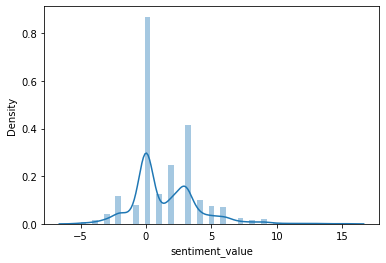

In [88]:
import seaborn as sns
sns.distplot(sent_df['sentiment_value'])

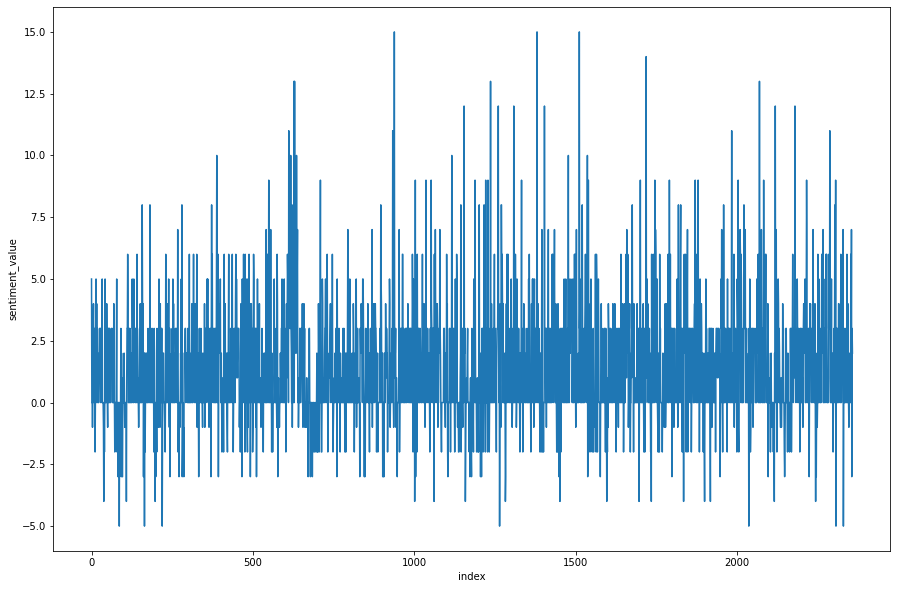

In [89]:
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

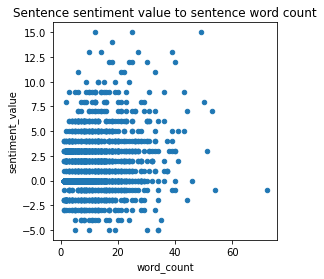

In [90]:
sent_df.plot.scatter(x='word_count',
                     y='sentiment_value',
                     figsize=(4,4),
                     title='Sentence sentiment value to sentence word count')